In [65]:
import tensorflow as tf
import tensorflow.keras as keras

In [76]:
mnist = tf.keras.datasets.mnist   # Números de 0 a 9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000
60000
60000
10000
10000


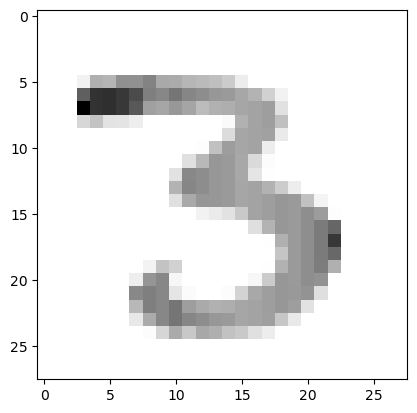

In [77]:
import matplotlib.pyplot as plt

plt.imshow(x_train[12], cmap = plt.cm.binary)
plt.show()

In [78]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [79]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2648 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1072 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0734 - accuracy: 0.9765


In [80]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 725us/step - loss: 0.0867 - accuracy: 0.9734
0.086748406291008 0.9733999967575073


In [88]:
import os.path
if os.path.isfile('models/modelo_salve_teste.h5') is False:
    model.save('models/medical_trial_model.h5')

In [89]:
new_model = tf.keras.models.load_model('models/modelo_salve_teste.h5')

In [90]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 769us/step


In [91]:
predictions


array([[9.6259161e-09, 1.5977989e-06, 2.3260845e-05, ..., 9.9980760e-01,
        2.3647086e-08, 5.4342963e-06],
       [4.1480384e-08, 1.3154629e-04, 9.9986434e-01, ..., 1.7224897e-09,
        5.3230514e-07, 1.4487614e-10],
       [1.2284117e-07, 9.9851048e-01, 4.3197273e-05, ..., 2.3249075e-04,
        3.9045347e-04, 2.9415254e-05],
       ...,
       [1.1565946e-09, 3.2477894e-07, 7.0322692e-08, ..., 6.4508904e-06,
        1.3610656e-06, 7.2135532e-05],
       [1.1004442e-07, 4.4172966e-06, 9.4501638e-07, ..., 5.3440931e-06,
        1.8458191e-03, 1.7147501e-08],
       [5.3845433e-08, 1.5811541e-07, 2.2327211e-07, ..., 3.3060603e-11,
        5.5899295e-07, 5.7363088e-09]], dtype=float32)

In [1]:
import numpy as np

n = 18

print(np.argmax(predictions[n]))
plt.imshow(x_test[n])

NameError: name 'predictions' is not defined